## **Introduction to EIS and 2nd-NLEIS**

Electrochemical impedance spectroscopy (EIS) is a powerful AC technique for characterizing electrochemical systems that possess different characteristic time scales. By sweeping through a wide range of frequencies from mHz to kHz, the ohmic, charge transfer, and diffusion response from an electrochemical system often can be separated, modeled, and visualized (often using a Nyquist plot). EIS can be performed in galvanostatic mode (G-EIS) or potentiostatic mode (P-EIS). The mathematical formations behind them are similar. The logic of choosing between these two modes for linear systems is elaborated in the following [webpage](https://www.biologic.net/topics/peis-or-geis-that-is-the-question/) by biologic. In typical Lithium ion battery experiments, G-EIS is often preferred. Here we will mostly focus on the mathematical formulation from a G-EIS perspective.

### **Mathematical Formulation**

In a classical G-EIS experiment, we introduced a pure sinusoidal current perturbation (Eq.1) to the system and measured a voltage response that is less than 5 mV to ensure a linear response. In the linear regime, the voltage response usually has a phase lag, mathematically represented by the complex variables shown in Eq.2. By dividing $\tilde{V}$ by $\Delta I$, we obtain the linear EIS response (Eq.3). It is important to note that the current, voltage, and impedance defined here are all complex variables. Euler's representation is chosen here to simplify the mathematical formulation. One might also find equivalent trigonometric functional formulations in the literature.

\begin{equation}
I = \Delta I \times \exp(j\omega t)\tag{1}
\end{equation}

\begin{equation}
\tilde{V} = \tilde{V}_1 \times \exp(j\omega t) + h.o.t\tag{2}
\end{equation}

\begin{equation}
\tilde{Z}_1 = \frac{\tilde{V}_1}{\Delta I} \tag{3}
\end{equation}

If we slightly over-perturb the system to more than 5 mV but less than roughly 20 mV, we can drive the system into the weakly nonlinear regime, where a linear and second harmonic nonlinear voltage response can be obtained. Though not shown here, the presence of a second harmonic can occur without corrupting the linear response. The voltage response can then be written as shown in Equation 4. With that, we can define our 2nd-NLEIS frequency response function (Eq. 5).

\begin{equation}
\tilde{V} = \tilde{V}_1 \times \exp(j\omega t) + \tilde{V}_2 \times \exp(j2\omega t) + h.o.t\tag{4}
\end{equation}

\begin{equation}
\tilde{Z}_2 = \frac{\tilde{V}_2}{(\Delta I)^2} \tag{5}
\end{equation}

In two-electrode cell experiments, 2nd-NLEIS introduces complementary signal parity to EIS. In EIS, the full-cell response comes from the sum of the positive and negative electrode half-cell EIS signals (Eq.6), whereas the full-cell 2nd-NLEIS signal results from the difference between the positive and negative electrode half-cell 2nd-NLEIS signals (Eq.7). The complementary parity of two-electrode EIS and 2nd-NLEIS signals sets a high standard for matching modeled physics to data when simultaneously fitting EIS and 2nd-NLEIS data, significantly reducing the model degeneracy and parameter identifiability challenges found in traditional linear EIS analysis alone.

\begin{equation}
\tilde{Z}_{1,cell} = \tilde{Z}_{1,+} + \tilde{Z}_{1,-} \tag{6}
\end{equation}

\begin{equation}
\tilde{Z}_{2,cell} = \tilde{Z}_{2,+} - \tilde{Z}_{2,-} \tag{7}
\end{equation}

**Important Note**

In the most recent release of nleis (v0.3), we have corrected our 2nd-NLEIS circuit element with a 0.5 factor to reflect the usage of sine or cosine perturbation in practical impedance measurement. This correction ensures the correct computation of impedance values from the time domain with our latest data loader, which provides a streamlined approach to ensure the consistency in data processing and analysis.

### **Experimental Method**

Experimentally, we need to ensure a pure sinusoidal AC current input is provided. A schematic of the current input in the time domain is shown in (a). $\Delta I$ can be obtained in the frequency domain by [Fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform) as shown in (c), where a single harmonic current signal is obtained without any higher order terms.

The corresponding time domain voltage response is shown in (b), where the total voltage response is the superposition of the complex first and second harmonic voltage responses. The magnitude of the complex first and second harmonic voltage responses can then be obtained using FFT as illustrated in (d), where any higher order term should be small to ensure the validity of both the EIS and 2nd-NLEIS responses.

The complex EIS and 2nd-NLEIS response can then be calculated using Eq. 3 and 4 at different frequencies to obtain the final impedance spectra.

**Note**: In practical experiments, there is a phase lag in the voltage response and a total harmonic distortion (THD) metric associated with the measurement. For simplicity, we have chosen to start the voltage response plot from the origin for illustrative purposes. Likewise, all electrochemical interfaces are nonlinear and can display more than the two harmonics illustrated. A rule of thumb for defining a 'small enough' nonlinear contribution to enable reliable linear-limit EIS is [THD<5%](https://www.biologic.net/topics/how-to-make-reliable-eis-measurements/). We apply several tests to ensure all 2nd NLEIS measurements occur within this 'sufficiently-linear' limit to validate our analysis.

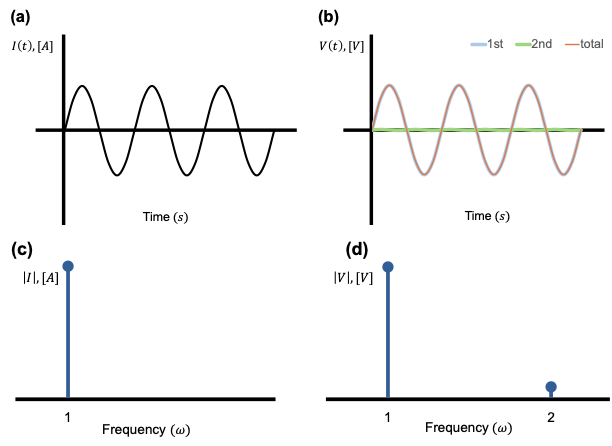

### **Data Interpretation**

In this tutorial, we will briefly go over the main electrochemical processess that happen in a battery system that can be observed using EIS and 2nd-NLEIS.

Schematics of typical EIS and 2nd-NLEIS spectra are shown in (a) and (b), respectively. The arrow in these figures shows the direction of increasing frequency. In the EIS schematic, one can distinguish low frequency thermodynamics and diffusion, mid-frequency charge transfer, and high frequency ohmic and inductance of a typical lithium-ion battery measurement. The separation between each electrochemical reaction is clear in this schematic, though real measurements often have overlapping reaction time scales and uncertain assignment of electrochemical reactions, which complicates the data analysis. As a result, the individual electrode responses are challenging to discriminate using only EIS without additional information.

The 2nd-NLEIS response measured simultaneously with EIS provides additional discriminating power with additional physical parameters and a reduced degree of freedom when analyzed simultaneously with EIS. The 2nd-NLEIS response also shows frequency dependent response of nonlinear thermodynamics, diffusion, and charge transfer as labeled in (b). The complementary parity defined by Eq. 6 and 7 can then help us discriminate between electrode responses with improved confidence and provide us with enriched physics information without further complicating the experimental measurement.

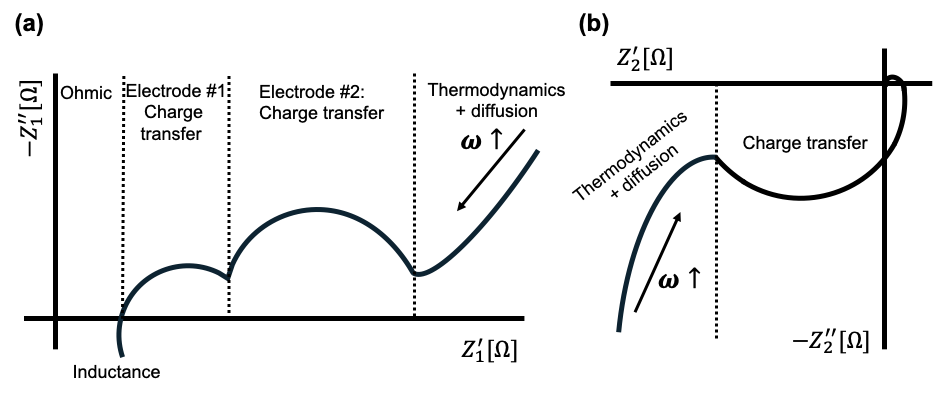

### **Equivalent Circuit Modeling**

The figure below shows a simple equivalent circuit representation of a two-electrode lithium-ion battery cell for EIS and 2nd-NLEIS that consists of internal resistance, anode, and cathode. For people familiar with equivalent circuit modeling and representations, one can notice that there is an extra dashed line for cathode charge transfer resistance. This dashed line suggests the presence of the nonlinear responses, which require a nonlinear circuit element for it. For the sake of EIS or no nonlinear response is present, one can simply ignore the nonlinear element and build the corresponding linear circuit.

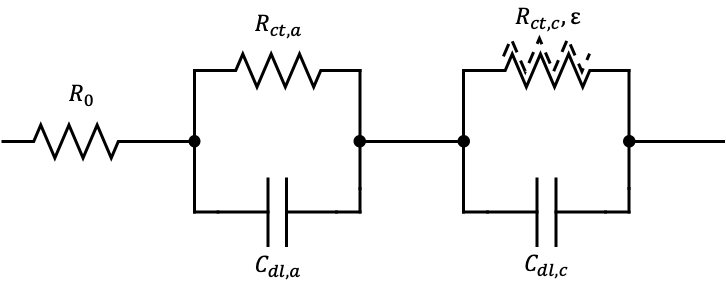

## **nleis.py Overview and Workflow**

We need to first load the common python package we might need to use

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Then Load the essential data from example and do the essential data processing.

In [ ]:
frequencies = np.loadtxt('https://raw.githubusercontent.com/yuefan98/2nd-NLEIS-manuscripts/main/NLEIS_toolbox/data/freq_30a.txt')
Z1 = np.loadtxt('https://raw.githubusercontent.com/yuefan98/2nd-NLEIS-manuscripts/main/NLEIS_toolbox/data/Z1s_30a.txt').view(complex)[1]
Z2 = np.loadtxt('https://raw.githubusercontent.com/yuefan98/2nd-NLEIS-manuscripts/main/NLEIS_toolbox/data/Z2s_30a.txt').view(complex)[1]

from nleis.data_processing import data_truncation
f,Z1,Z2,f2_trunc,Z2_trunc = data_truncation(frequencies, Z1, Z2)

f, Z1, and Z2 are kept in the same dimension while the high-frequency inductance region is eliminated. f2_trunc and Z2_trunc give the truncated 2nd-NLEIS response that is defaulted to a maximum frequency (max_f = 10 Hz)

### **Individual EIS analysis using nleis.py**

`nleis.py` provides additional wrapper functions for linear circuit elements. One can benefit from the additional wrapper functions and use them for efficient EIS analysis. To do that, we need to first import `CustomCircuit` from `impedance.py`, and `nleis` from nleis.py.

In [3]:
from impedance.models.circuits import CustomCircuit
from nleis import nleis ## nleis must be imported to use additioanl EIS function introduced by nleis.py

If 2nd-NLEIS analysis will be performed on a two-electrode cell, it is important that the circuit first define the elements for the positive electrode followed by the circuit elements for the negative electrode, since the 2nd-NLEIS signal arises from subtracting the "+" electrode response from the "-" as shown in Eq. (7). 

Check out the documentation page for the details of the function definitions. Other workflows are the same as impedance.py. The following code shows you how to use the wrapper function to build an equivalent circuit model for a lithium-ion battery with a porous electrode cathode and anode that is packed with spherical particles.

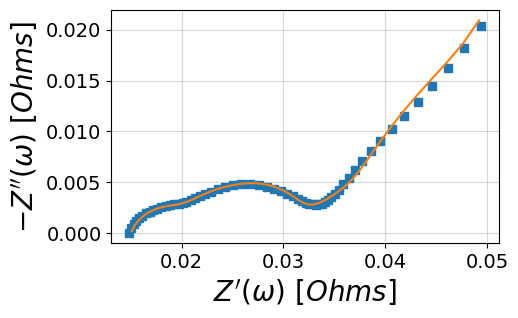

In [4]:
EIS_circuit = 'L0-R0-TDS0-TDS1'
initial_guess_EIS = np.ones(12)*0.02
circuit_1 = CustomCircuit(EIS_circuit, initial_guess = initial_guess_EIS)
circuit_1.fit(f, Z1)
circuit_1.plot(f_data = f, Z_data = Z1, kind = 'nyquist')
plt.show()

### **Individual NLEIS analysis using nleis.py**

In order to analyze NLEIS data individually, we need to define and build a NLEIS circuit model. This is currently done through NLEISCustomCircuit.

It has the same syntax as adopted in impedance.py. To do that, we need to first import `NLEISCustomCircuit`

In [5]:
from nleis import NLEISCustomCircuit

The function will process the data and the default truncation is 10Hz. The following code shows you how to take the difference (`d()`) between two electrode responses

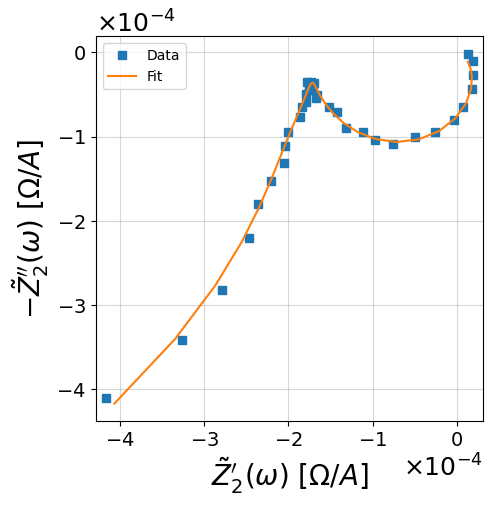

In [6]:
NLEIS_circuit = 'd(TDSn0,TDSn1)'
initial_guess_NLEIS= [5e-3,1e-3,10,1e-2,100,10,0.1
                   ,1e-3,1e-3,1e-3,1e-2,1000,0,0
                   ]
circuit_2 = NLEISCustomCircuit(NLEIS_circuit, initial_guess = initial_guess_NLEIS)
circuit_2.fit(f2_trunc, Z2_trunc)
circuit_2.plot(f_data = f2_trunc, Z2_data = Z2_trunc, kind = 'nyquist')
plt.show()

### **Simultaneous analysis of EIS and 2nd-NLEIS using nleis.py**

The simultaneous analysis of EIS and 2nd-NLEIS is enabled by the `EISandNLEIS` class, which requires input from both linear and nonlinear circuit. The order of the circuits should strictly follow positive electrode first and negative electrode last for both linear and nonlinear circuits as mentioned previously.

**Note:** `EISandNLEIS.fit()` will do the data processing automatically, so it is important to keep frequencies, Z1, and Z2 the same length.

The default optimization method is max normalization (`opt = 'max'`) with nonlinear least square algorithm. Negative log-likelihood optimization(`opt ='neg'`) is also provided, but it is less stable compared to max normalization.

In [7]:
from nleis import EISandNLEIS

EIS_circuit = 'L0-R0-TDS0-TDS1'
NLEIS_circuit = 'd(TDSn0,TDSn1)'

initial_guess_3 = [1e-7,1e-3 # L0,RO
                   ,5e-3,1e-3,10,1e-2,100,10,0.1 ## TDS0 + additioal nonlinear parameters
                   ,1e-3,1e-3,1e-3,1e-2,1000,0,0 ## TDS1 + additioal nonlinear parameters
                   ]
circuit_3 = EISandNLEIS(EIS_circuit, NLEIS_circuit, initial_guess = initial_guess_3)
circuit_3.fit(f, Z1, Z2, opt = 'max')

The default visualization style is Nyquist, bode plot can also be obtained using `kind = 'bode'`.

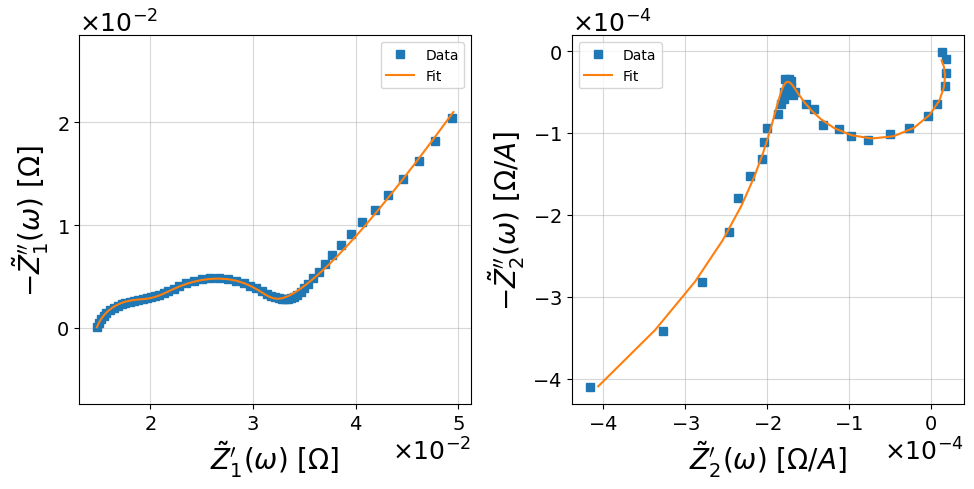

In [8]:
circuit_3.plot(f_data = f, Z1_data = Z1, Z2_data = Z2, kind = 'nyquist')
plt.tight_layout()
plt.show()

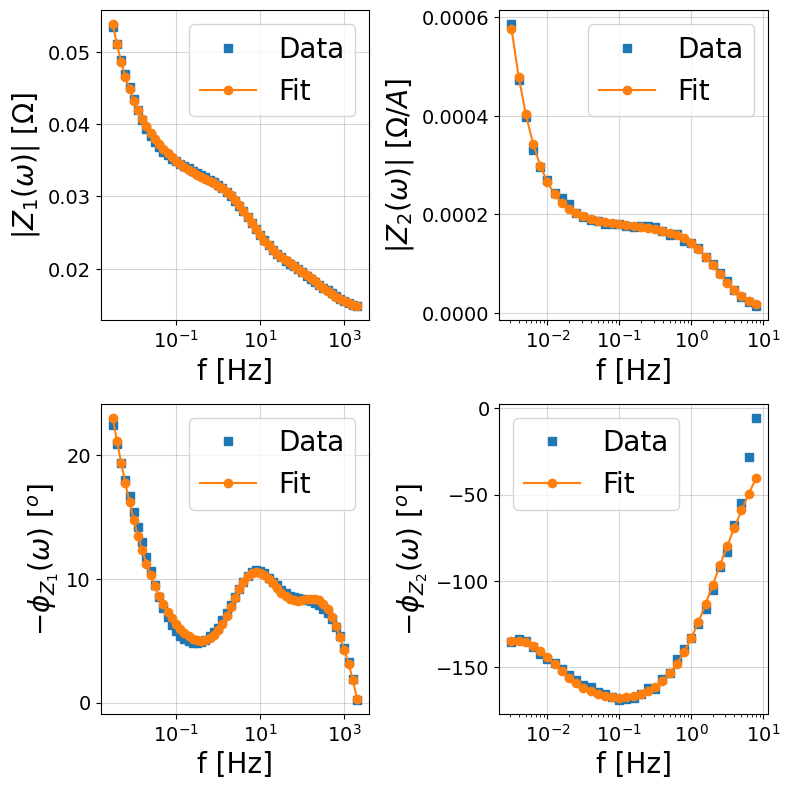

In [9]:
circuit_3.plot(f_data = f, Z1_data = Z1, Z2_data = Z2, kind='bode')
plt.tight_layout()
plt.show()

Interactive EIS and 2nd-NLIES plot can also be obtained with `kind = 'altair'`

In [10]:
EIS_plot,NLEIS_plot = circuit_3.plot(f_data = f, Z1_data = Z1, Z2_data = Z2, kind = 'altair',max_f = 10)

In [11]:
EIS_plot

alt.HConcatChart(...)

In [12]:
NLEIS_plot

alt.HConcatChart(...)

`circuit.predict()` can be used to obtain Z1 and Z2 for given frequencies

In [13]:
Z1_pred, Z2_pred = circuit_3.predict(f)

A dictionary of parameters for EIS and NLEIS can also be obtained using `circuit.extract()`

In [14]:
EIS_dict, NLEIS_dict = circuit_3.extract()

`print(circuit)` will show the state information just like impedance.py

In [15]:
print(circuit_3)


EIS Circuit string: L0-R0-TDS0-TDS1
NLEIS Circuit string: d(TDSn0,TDSn1)
Fit: True

EIS Initial guesses:
     L0 = 1.00e-07 [H]
     R0 = 1.00e-03 [Ohm]
  TDS0_0 = 5.00e-03 [Ohms]
  TDS0_1 = 1.00e-03 [Ohms]
  TDS0_2 = 1.00e+01 [F]
  TDS0_3 = 1.00e-02 [Ohms]
  TDS0_4 = 1.00e+02 [s]
  TDS1_0 = 1.00e-03 [Ohms]
  TDS1_1 = 1.00e-03 [Ohms]
  TDS1_2 = 1.00e-03 [F]
  TDS1_3 = 1.00e-02 [Ohms]
  TDS1_4 = 1.00e+03 [s]

NLEIS Initial guesses:
  TDSn0_0 = 5.00e-03 [Ohms]
  TDSn0_1 = 1.00e-03 [Ohms]
  TDSn0_2 = 1.00e+01 [F]
  TDSn0_3 = 1.00e-02 [Ohms]
  TDSn0_4 = 1.00e+02 [s]
  TDSn0_5 = 1.00e+01 [1/V]
  TDSn0_6 = 1.00e-01 []
  TDSn1_0 = 1.00e-03 [Ohms]
  TDSn1_1 = 1.00e-03 [Ohms]
  TDSn1_2 = 1.00e-03 [F]
  TDSn1_3 = 1.00e-02 [Ohms]
  TDSn1_4 = 1.00e+03 [s]
  TDSn1_5 = 0.00e+00 [1/V]
  TDSn1_6 = 0.00e+00 []

EIS Fit parameters:
     L0 = 9.81e-08  (+/- 1.96e-08) [H]
     R0 = 1.35e-02  (+/- 2.29e-04) [Ohm]
  TDS0_0 = 2.52e-02  (+/- 1.67e-03) [Ohms]
  TDS0_1 = 5.06e-03  (+/- 2.98e-04) [Ohms]
  TDS0_

The `nleis.py` also enables you to save and load templates just like impedance.py

In [16]:
circuit_3.save('fitted_template.json')

We can then load it for future reference

In [17]:
from nleis import EISandNLEIS

test_circuit = EISandNLEIS()
test_circuit.load('fitted_template.json', fitted_as_initial=True)
print(test_circuit)


EIS Circuit string: L0-R0-TDS0-TDS1
NLEIS Circuit string: d(TDSn0,TDSn1)
Fit: False

EIS Initial guesses:
     L0 = 9.81e-08 [H]
     R0 = 1.35e-02 [Ohm]
  TDS0_0 = 2.52e-02 [Ohms]
  TDS0_1 = 5.06e-03 [Ohms]
  TDS0_2 = 8.82e+00 [F]
  TDS0_3 = 8.77e-05 [Ohms]
  TDS0_4 = 3.58e+00 [s]
  TDS1_0 = 2.09e-02 [Ohms]
  TDS1_1 = 1.14e-03 [Ohms]
  TDS1_2 = 8.14e-01 [F]
  TDS1_3 = 1.81e+02 [Ohms]
  TDS1_4 = 3.09e+09 [s]

NLEIS Initial guesses:
  TDSn0_0 = 2.52e-02 [Ohms]
  TDSn0_1 = 5.06e-03 [Ohms]
  TDSn0_2 = 8.82e+00 [F]
  TDSn0_3 = 8.77e-05 [Ohms]
  TDSn0_4 = 3.58e+00 [s]
  TDSn0_5 = 1.23e+01 [1/V]
  TDSn0_6 = 8.75e-02 []
  TDSn1_0 = 2.09e-02 [Ohms]
  TDSn1_1 = 1.14e-03 [Ohms]
  TDSn1_2 = 8.14e-01 [F]
  TDSn1_3 = 1.81e+02 [Ohms]
  TDSn1_4 = 3.09e+09 [s]
  TDSn1_5 = 1.02e+00 [1/V]
  TDSn1_6 = 6.39e-03 []



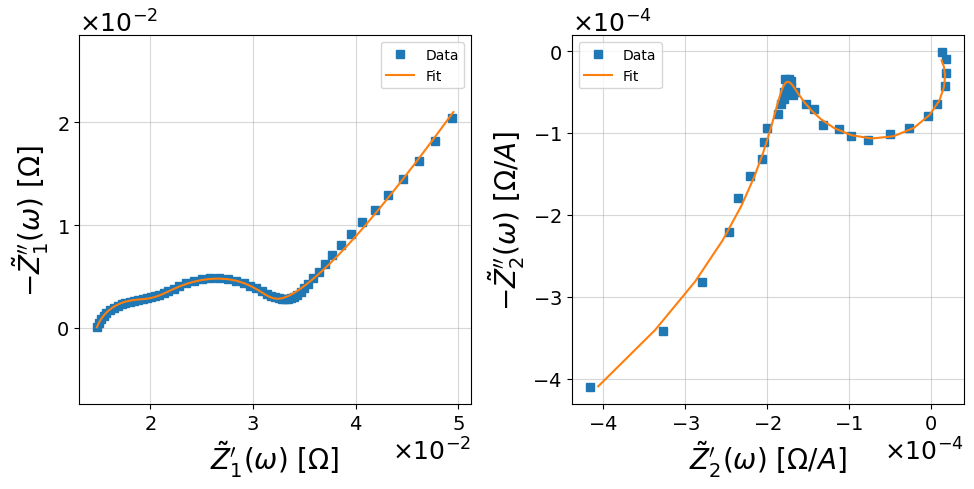

In [18]:
test_circuit.fit(f, Z1, Z2, opt='max')
test_circuit.plot(f_data = f, Z1_data = Z1, Z2_data = Z2, kind = 'nyquist')
plt.tight_layout()
plt.show()